<a href="https://colab.research.google.com/github/shubhambudde1/LibraryManagementSystem/blob/main/Stock_Market_Analysis_and_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis and Prediction

## Importing packages and datasets

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
# from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

## Importing datasets from Yahoo reader

In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    # Set DataFrame as the Stock Ticker
    globals()[stock] = yf.download(stock, start=start, end=end)

/tmp/ipython-input-2103576214.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2103576214.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2103576214.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2103576214.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


## Display data characteristics

In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2025-11-14,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,234.690002,238.729996,232.889999,235.059998,38956700.0
2025-11-17,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,232.869995,234.600006,229.190002,233.250000,59919000.0
2025-11-18,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,222.550003,230.199997,222.419998,228.100006,60608400.0
2025-11-19,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,222.690002,223.740005,218.520004,223.740005,58335600.0
2025-11-20,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,217.139999,227.410004,216.740005,227.050003,50309000.0
2025-11-21,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,220.690002,222.210007,215.179993,216.350006,68490500.0
2025-11-24,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,226.279999,227.330002,222.270004,222.559998,54318400.0
2025-11-25,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,229.669998,230.520004,223.800003,226.380005,39379300.0


## Individual Stocks Description

In [6]:
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,229.230504,231.676365,226.586841,228.925535,5.460776e+07
std,23.513835,23.228749,23.667774,23.445122,2.315747e+07
min,171.832397,189.691325,168.633346,171.364011,2.013560e+07
25%,209.568771,211.516723,207.283587,209.488932,4.115360e+07
50%,229.497528,232.080378,226.850094,229.027982,4.806810e+07
75%,246.257919,248.167598,244.384319,246.385646,5.903080e+07
max,278.850006,280.380005,276.630005,277.260010,1.843959e+08


In [ ]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,1453.862414,1418.664735,1435.254270,1436.933391,1.876525e+06,1436.933391
std,149.597689,151.881462,150.527080,149.588543,7.748254e+05,149.588543
min,1071.319946,1013.536011,1056.510010,1056.619995,3.475000e+05,1056.619995
25%,1360.349976,1340.125000,1350.000000,1349.207458,1.387325e+06,1349.207458
50%,1455.510010,1429.140015,1445.289978,1445.784973,1.656400e+06,1445.784973
75%,1531.748993,1505.341766,1515.599976,1518.315002,2.155150e+06,1518.315002
max,1818.060059,1767.689941,1790.900024,1781.380005,4.329100e+06,1781.380005


In [ ]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,188.973135,184.077698,186.526032,186.619524,3.712551e+07,185.511522
std,24.138847,24.072774,24.247144,24.096366,1.728312e+07,24.420203
min,140.570007,132.520004,137.009995,135.419998,8.989200e+06,134.366470
25%,166.767502,162.945007,165.070000,165.137501,2.504942e+07,163.815369
50%,187.154999,183.425003,185.489998,185.355003,3.215935e+07,184.206291
75%,211.190002,206.579994,208.922501,208.757500,4.391550e+07,207.740131
max,232.860001,227.350006,229.270004,231.649994,9.707360e+07,231.045105


In [ ]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,2573.748925,2502.666507,2539.267663,2539.407336,4.904719e+06,2539.407336
std,587.659662,565.261876,580.502657,575.396847,2.009943e+06,575.396847
min,1750.000000,1626.030029,1641.510010,1676.609985,8.813000e+05,1676.609985
25%,1954.877502,1891.530029,1925.440033,1908.667480,3.429775e+06,1908.667480
50%,2475.964966,2433.629883,2451.505005,2454.965088,4.519400e+06,2454.965088
75%,3175.025024,3087.037537,3135.289978,3125.952515,5.807300e+06,3125.952515
max,3552.250000,3486.689941,3547.000000,3531.449951,1.556730e+07,3531.449951


## Visualization of stocks

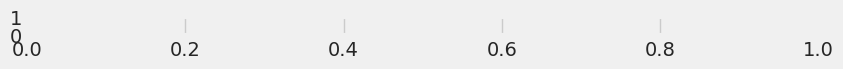

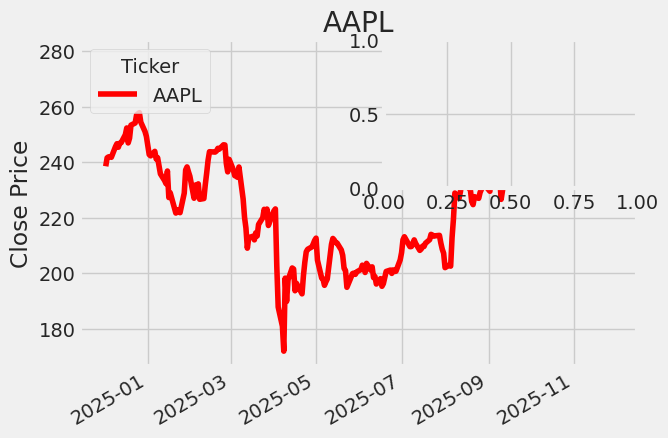

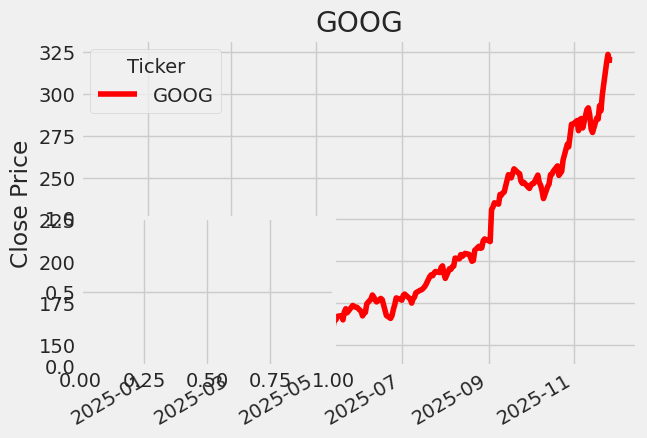

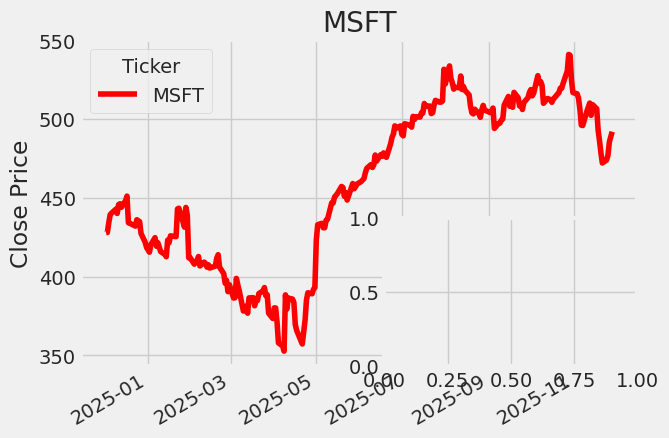

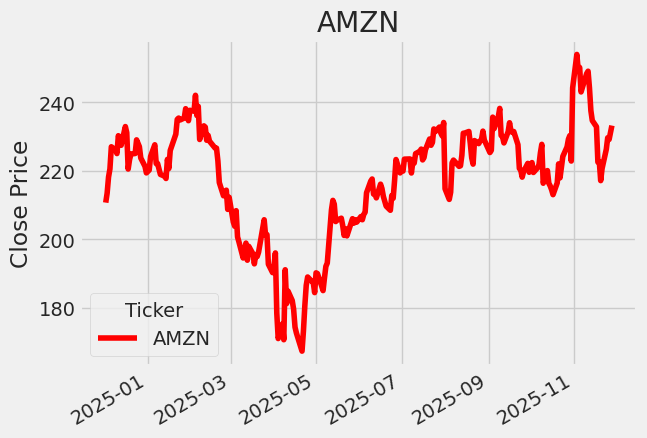

In [8]:
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot(color='r')
    plt.ylabel('Close Price')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## Daily stocks exchange

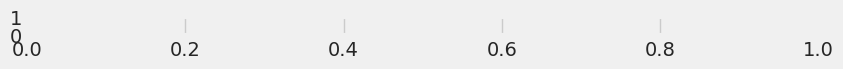

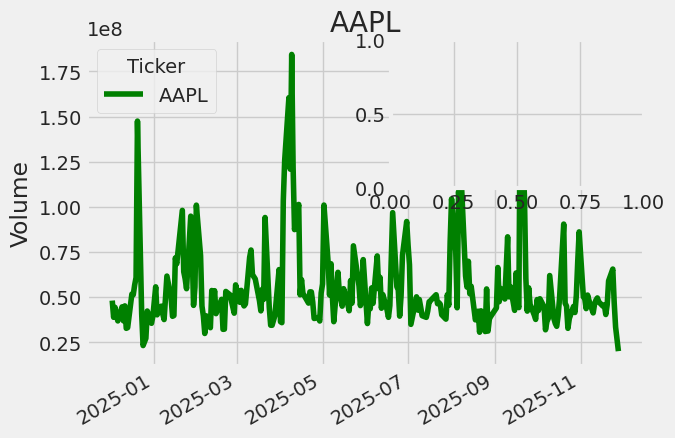

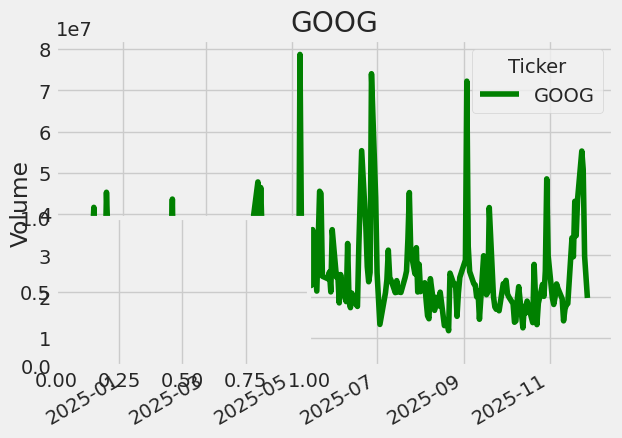

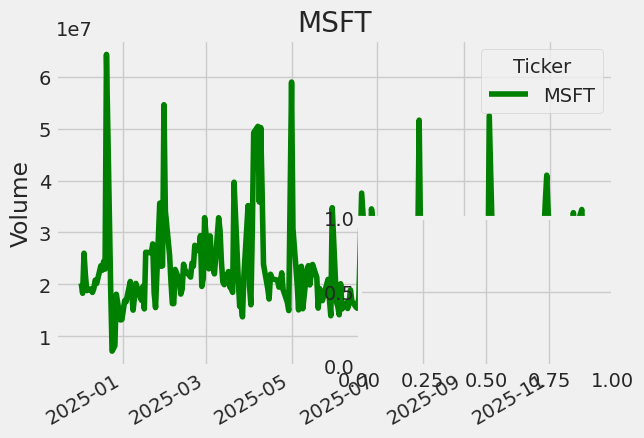

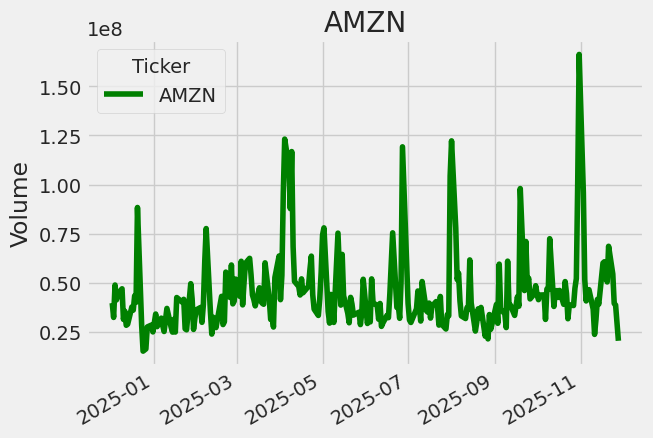

In [18]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color='g')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## Moving Average of various stocks

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

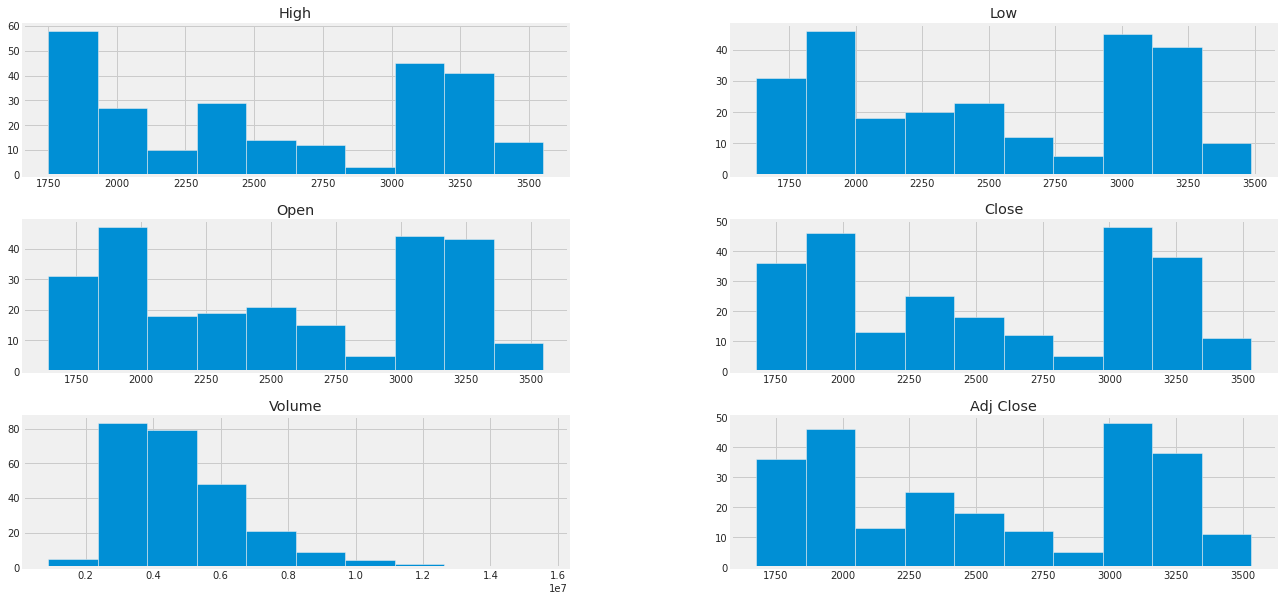

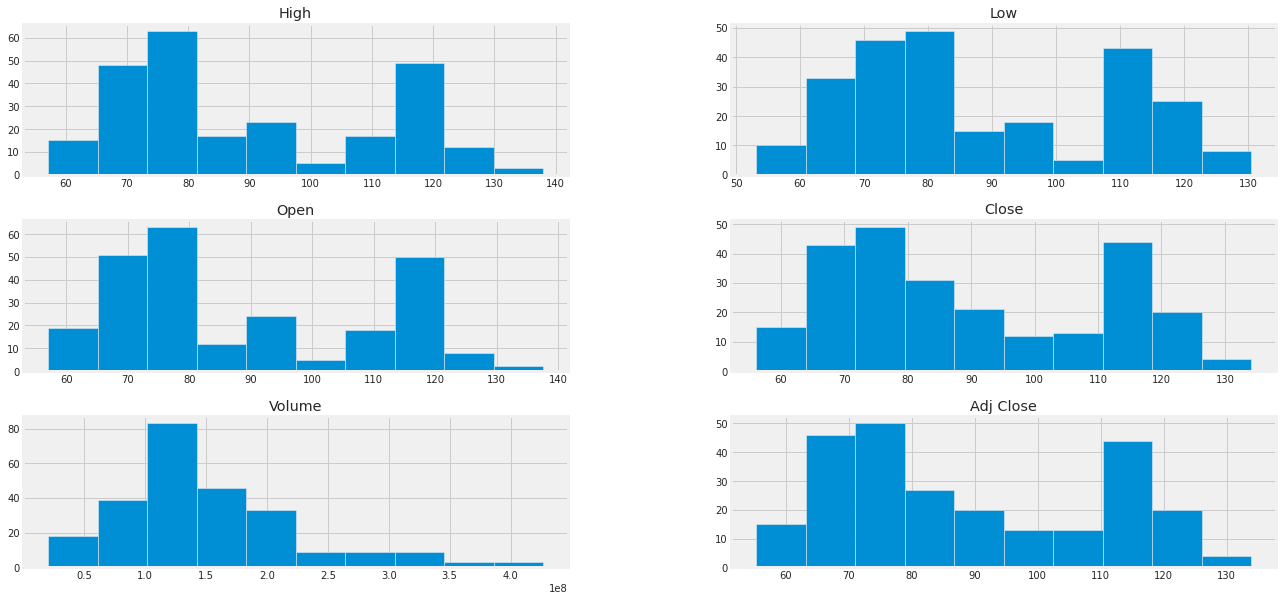

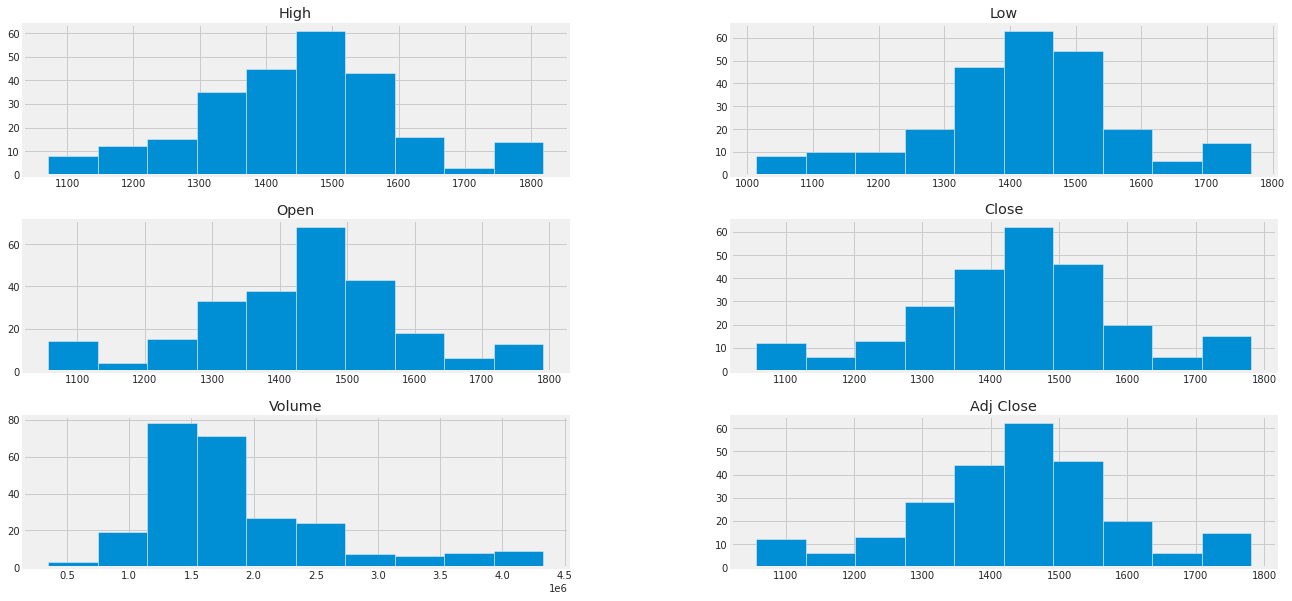

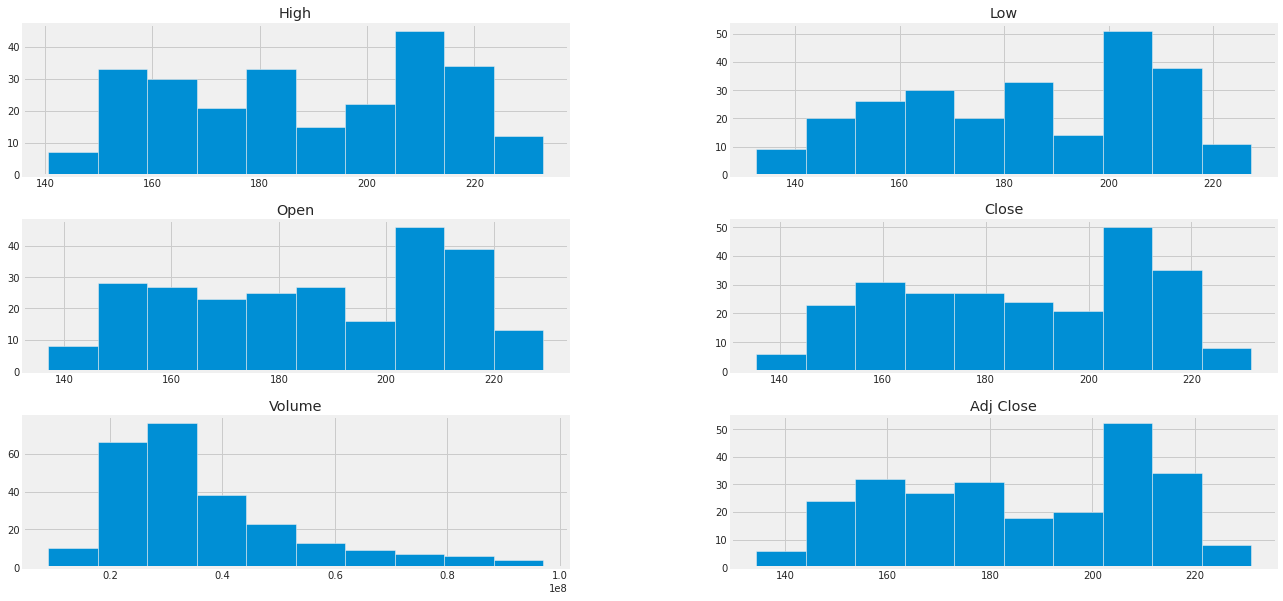

In [ ]:
df.groupby("company_name").hist(figsize=(20, 10));

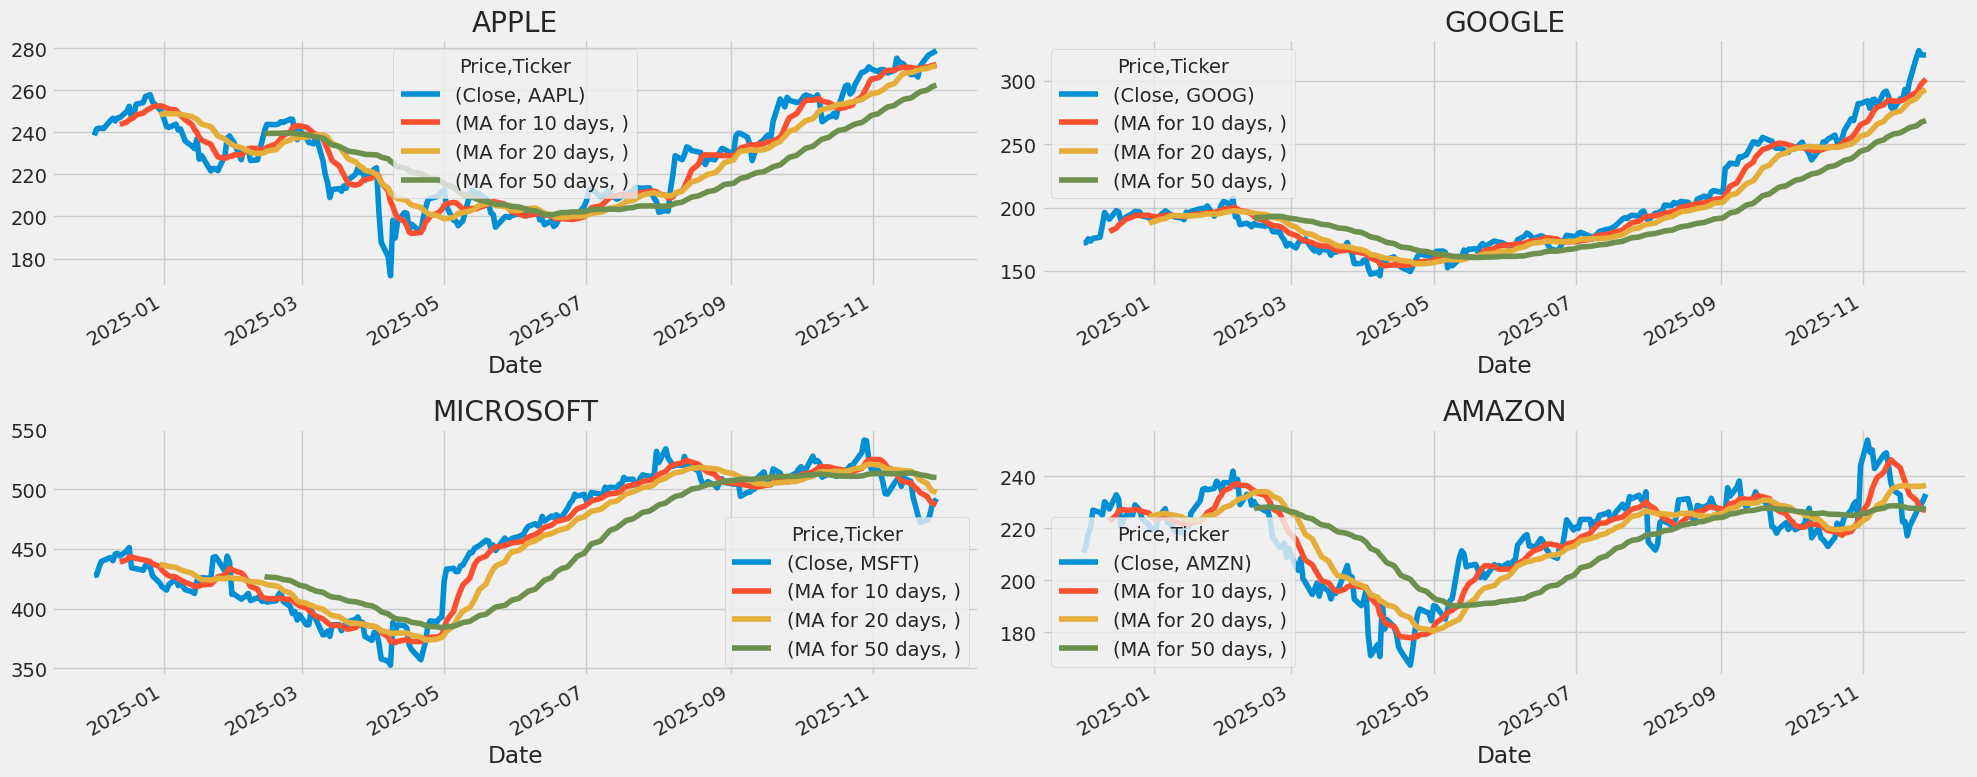

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Daily average return of stocks

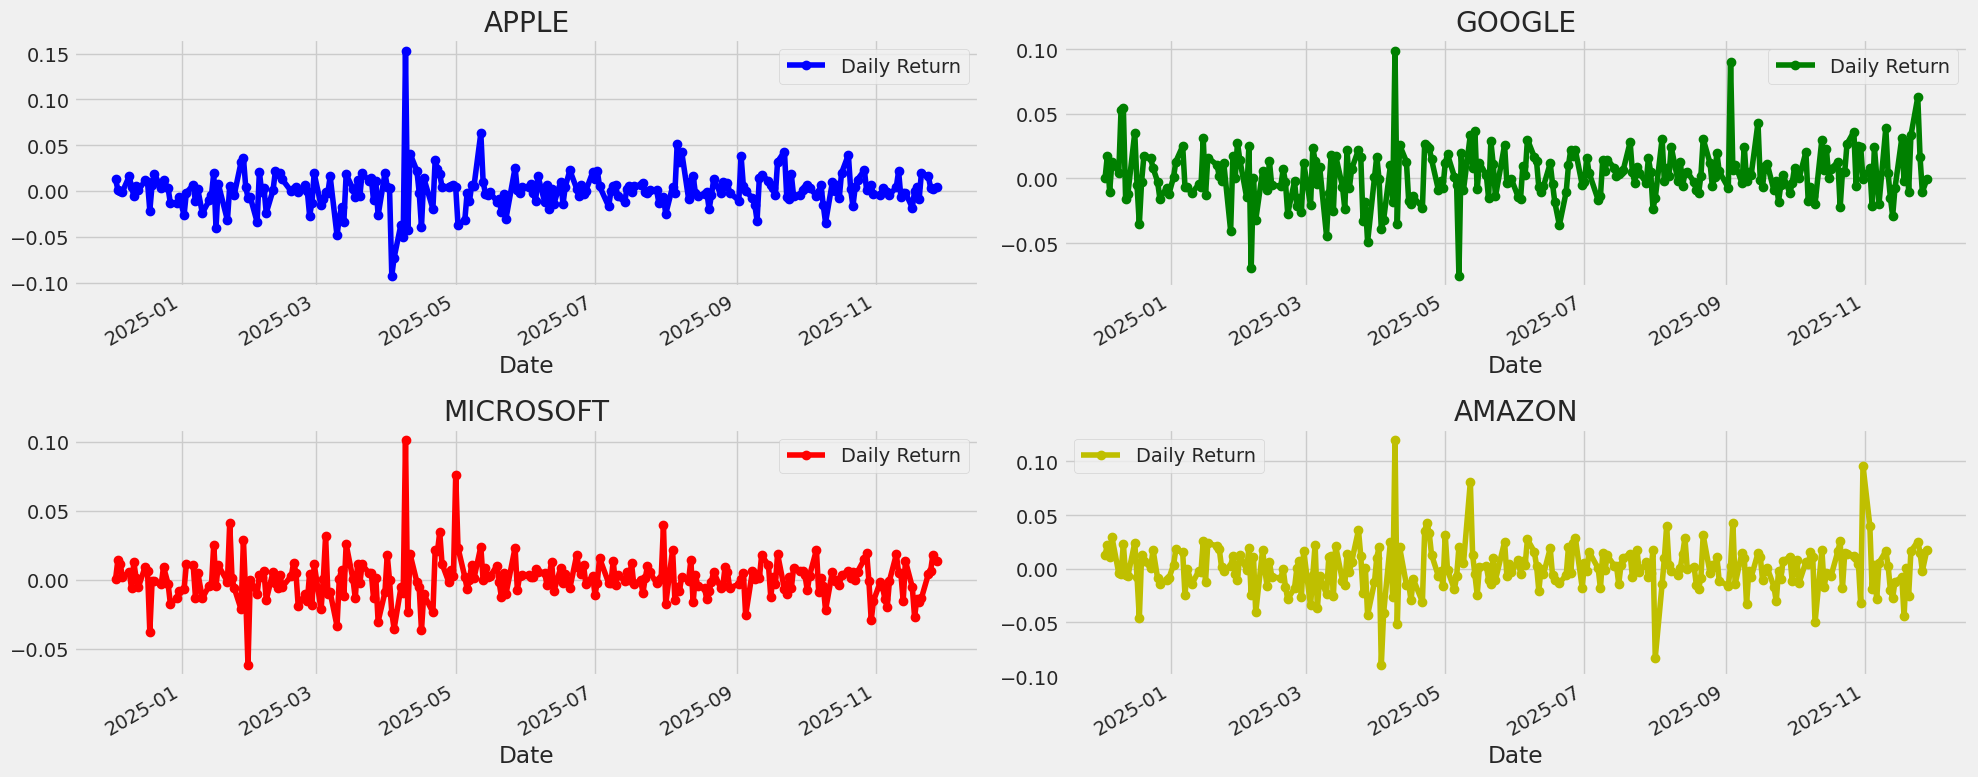

In [11]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True,  marker='o',color='b')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True,  marker='o',color='g')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, marker='o',color='r')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True,  marker='o',color='y')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

/tmp/ipython-input-1187399222.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
/tmp/ipython-input-1187399222.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
/tmp/ipython

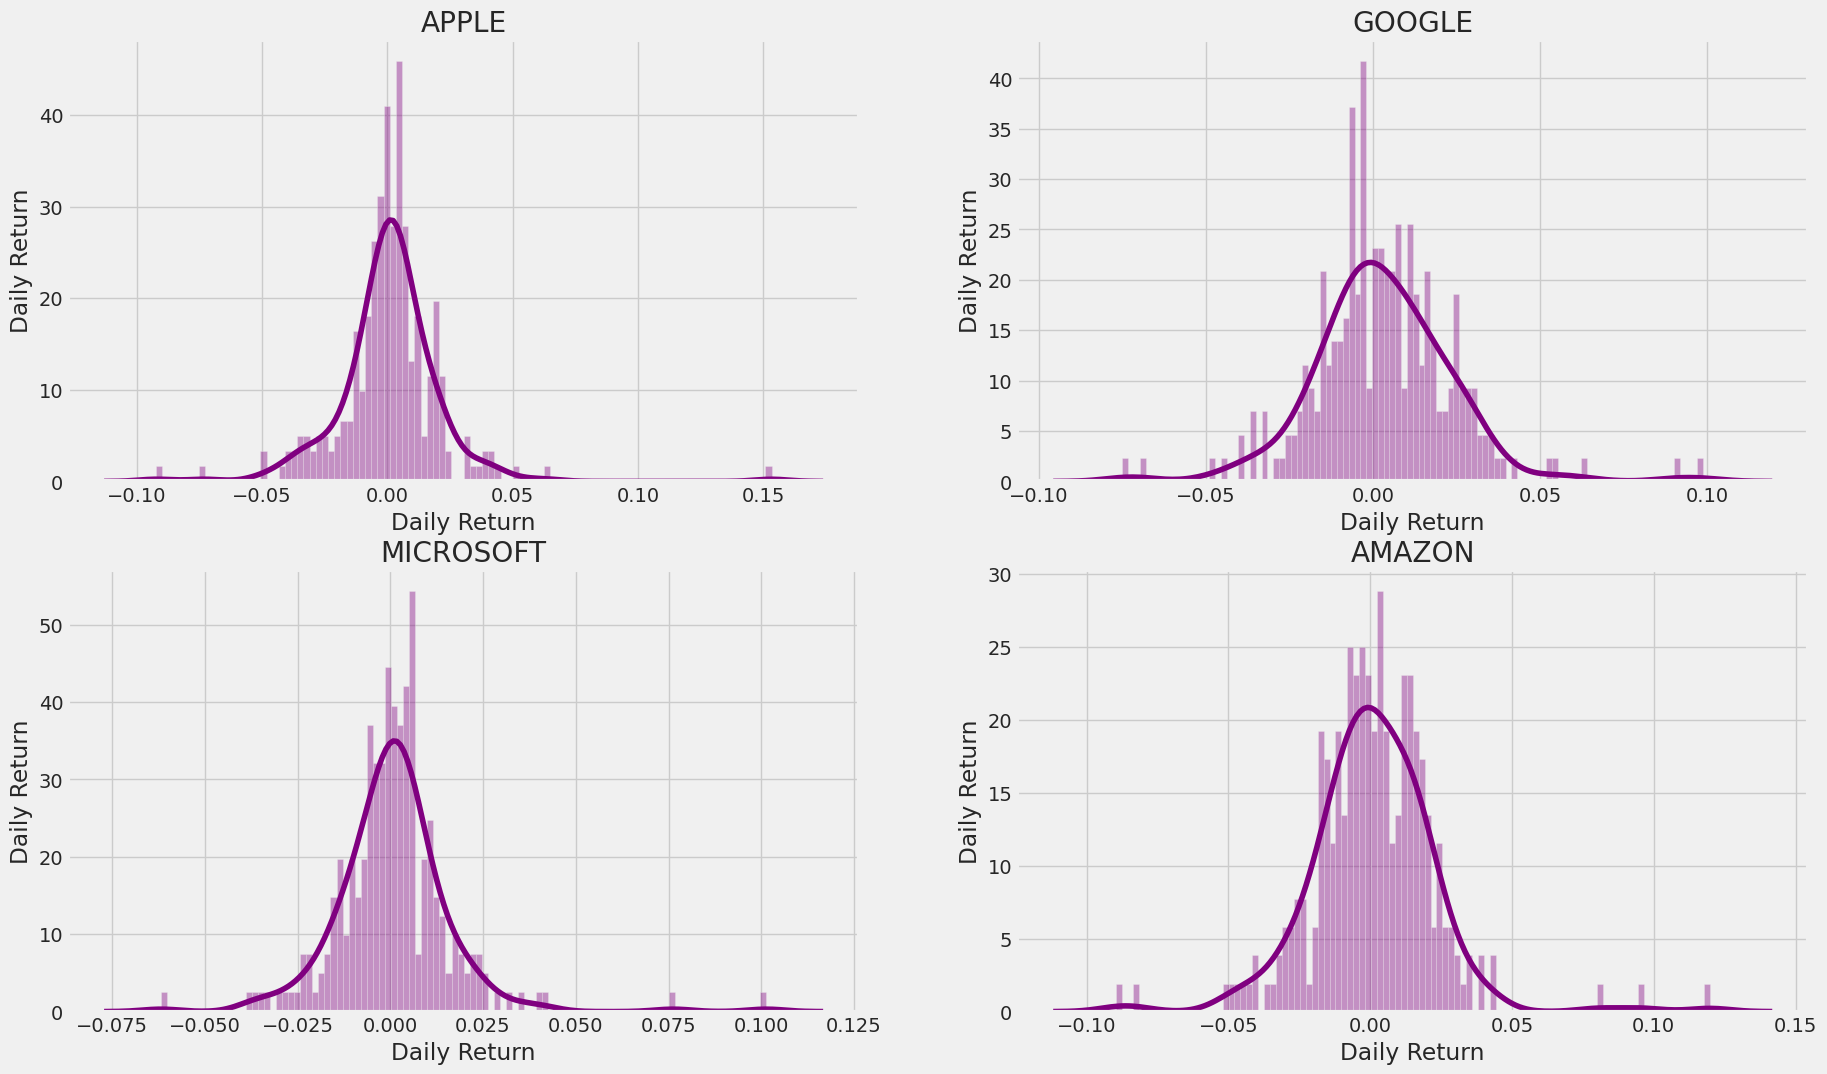

In [21]:
plt.figure(figsize=(20, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

## Correlation between stocks

In [22]:
closing_df = yf.download(tech_list, start=start, end=end)['Close']
closing_df.head()

/tmp/ipython-input-790168298.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  closing_df = yf.download(tech_list, start=start, end=end)['Close']
[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-12-02,238.511276,210.710007,172.226212,427.824066
2024-12-03,241.557480,213.440002,172.266037,428.042419
2024-12-04,241.915863,218.160004,175.322662,434.216888
2024-12-05,241.945740,220.550003,173.550415,439.378784
2024-12-06,241.746628,227.029999,175.720947,440.321838


In [26]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-12-02,NaN,NaN,NaN,NaN
2024-12-03,0.012772,0.012956,0.000231,0.000510
2024-12-04,0.001484,0.022114,0.017744,0.014425
2024-12-05,0.000124,0.010955,-0.010108,0.011888
2024-12-06,-0.000823,0.029381,0.012507,0.002146


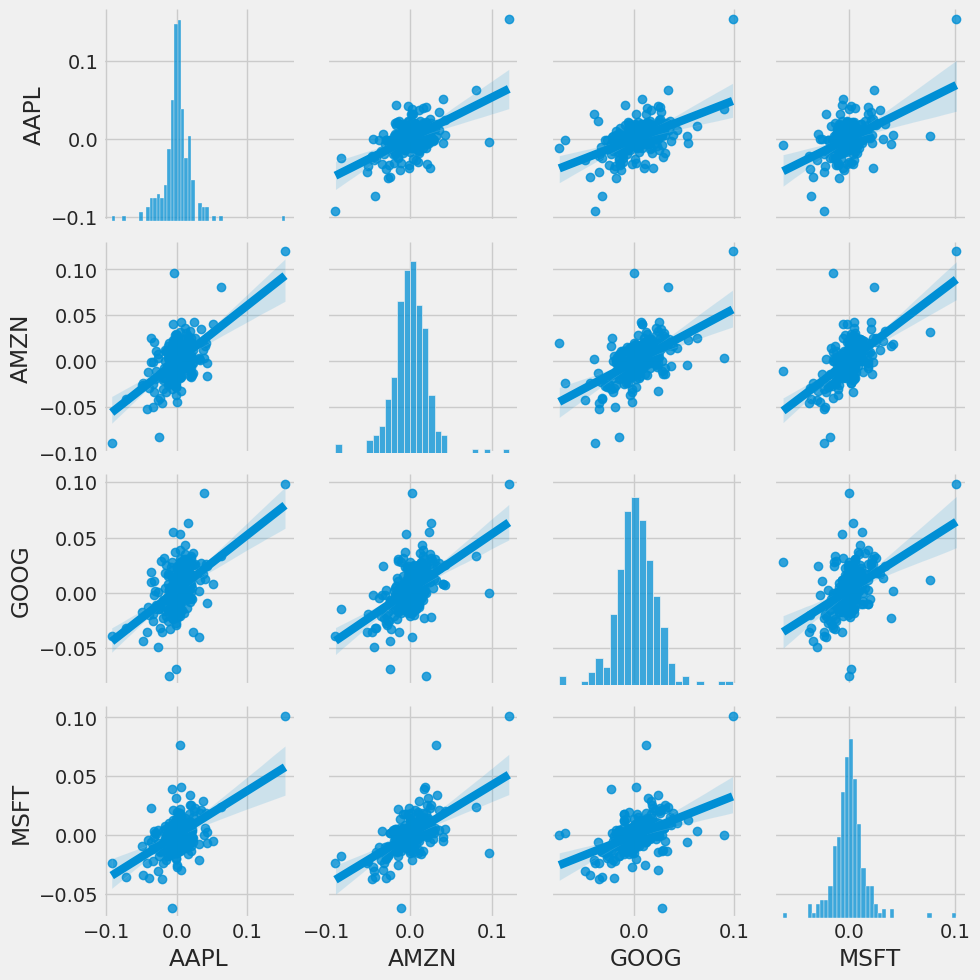

In [27]:
sns.pairplot(tech_rets, kind='reg')

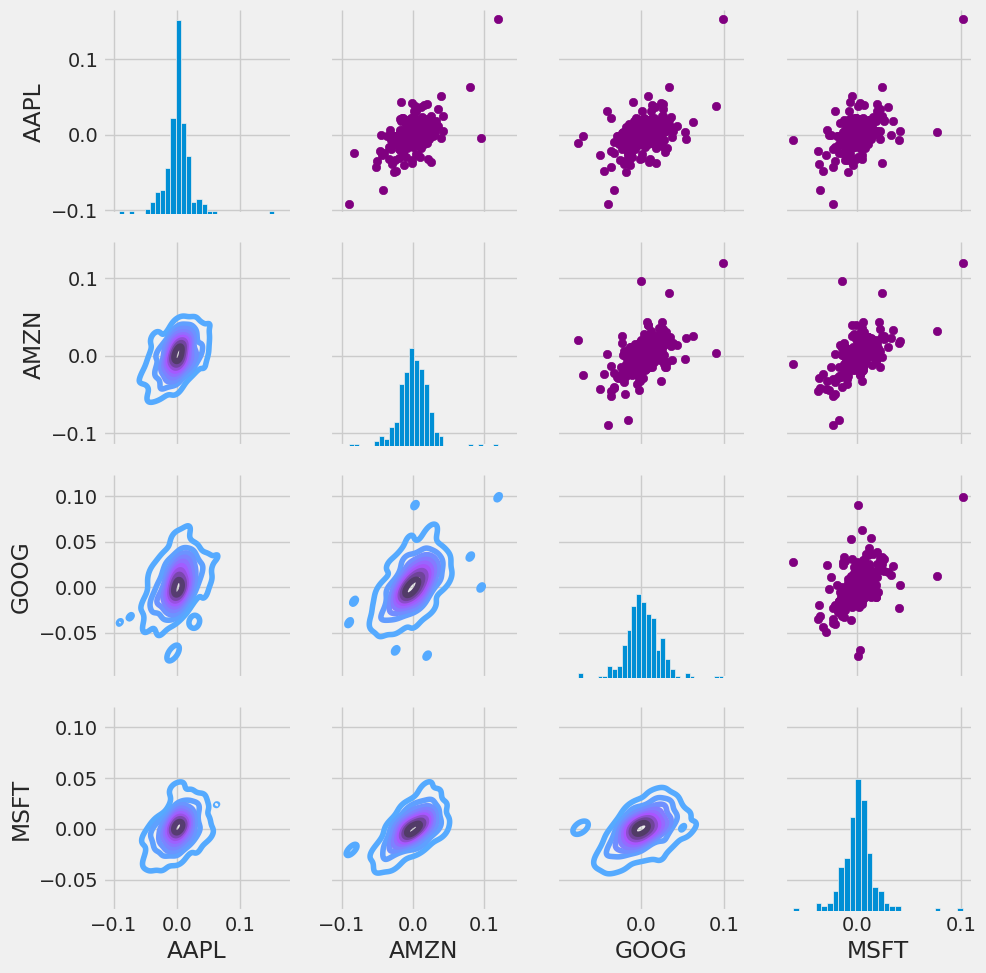

In [29]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

<Axes: xlabel='Ticker', ylabel='Ticker'>

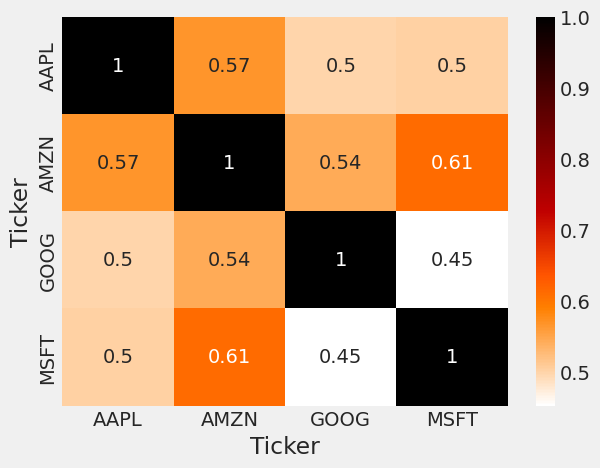

In [30]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='gist_heat_r')

<Axes: xlabel='Ticker', ylabel='Ticker'>

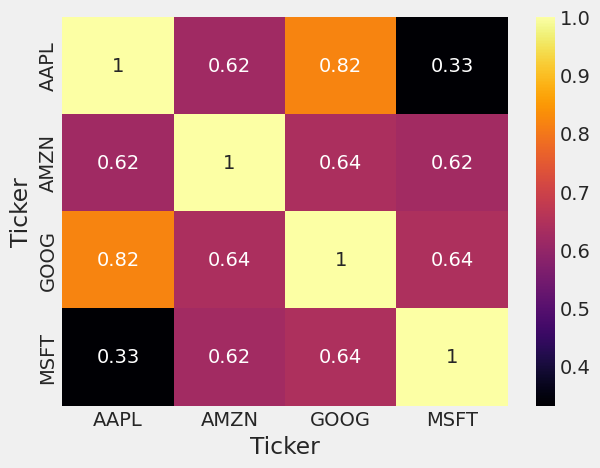

In [31]:
sns.heatmap(closing_df.corr(), annot=True, cmap='inferno')

## Risk on a particular stock

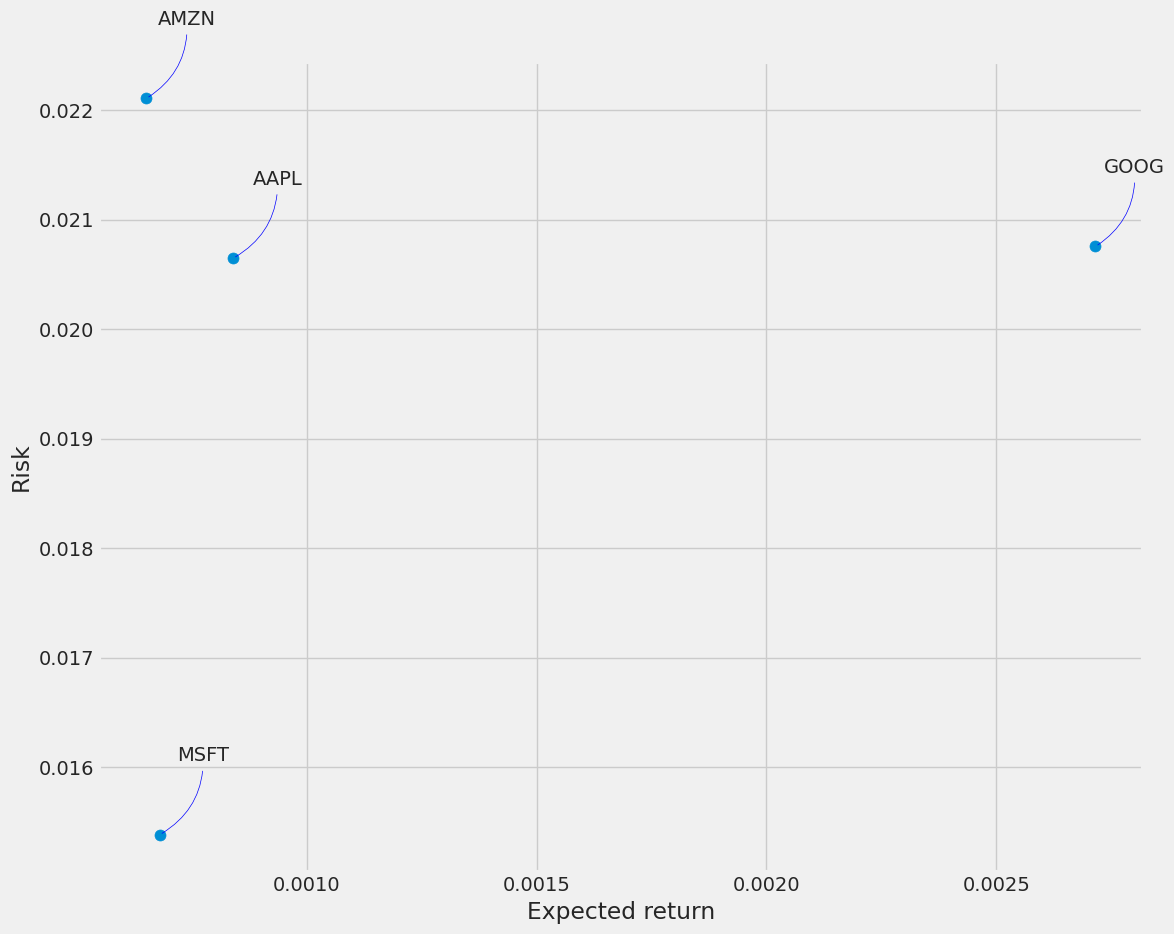

In [32]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [33]:
#Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
#Show teh data
df

/tmp/ipython-input-3946115912.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.333218,12.371307,12.266338,12.278335,302220800
2012-01-04,12.399495,12.436685,12.274733,12.296326,260022000
2012-01-05,12.537155,12.552750,12.376403,12.444783,271269600
2012-01-06,12.668217,12.678713,12.572845,12.589340,318292800
2012-01-09,12.648123,12.828669,12.636726,12.761190,394024400
...,...,...,...,...,...
2025-11-21,271.489990,273.329987,265.670013,265.950012,59030800
2025-11-24,275.920013,277.000000,270.899994,270.899994,65585800


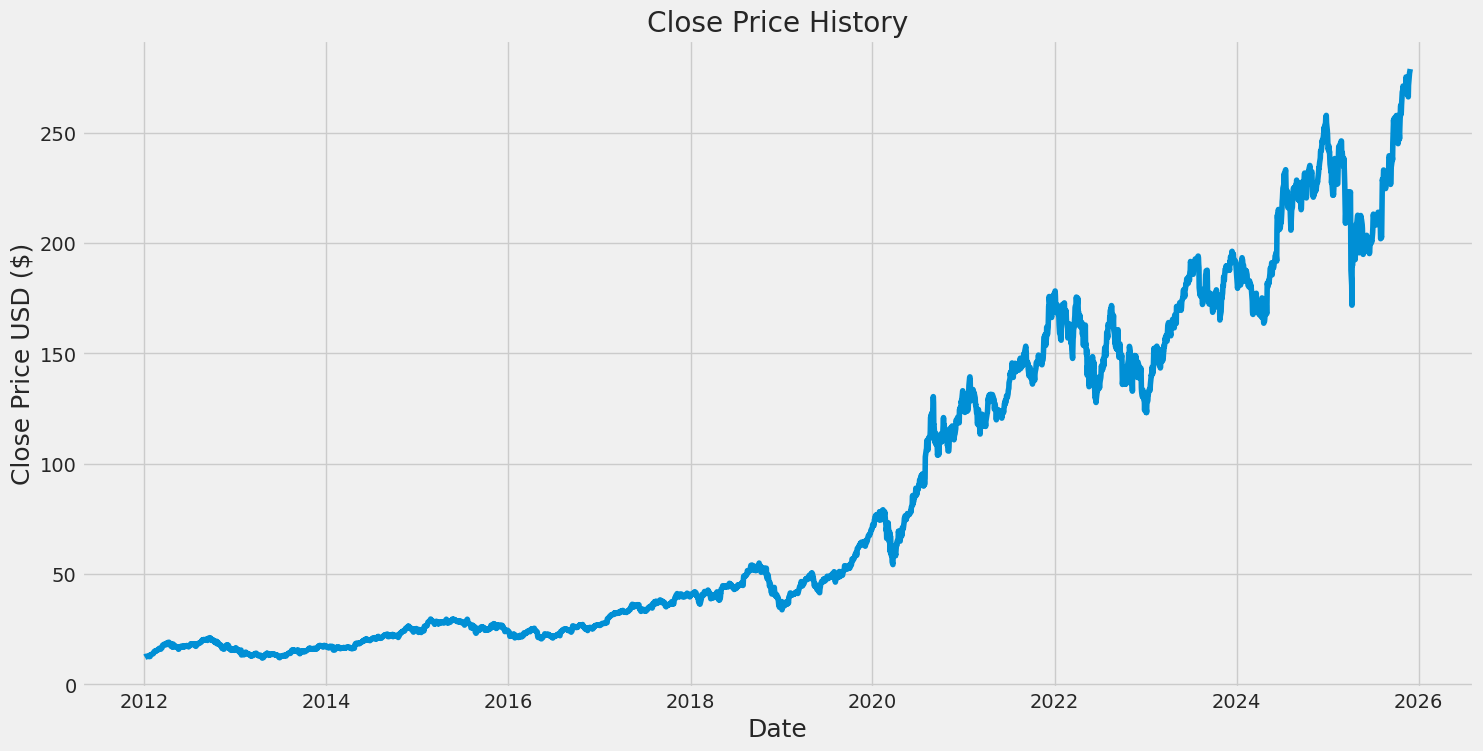

In [34]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [37]:
#Create a new dataframe with only the 'Close' column
data = df[['Close']]
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

2799

In [38]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00167788],
       [0.00192614],
       [0.00244179],
       ...,
       [0.99295785],
       [0.99513037],
       [1.        ]])

In [39]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00167788, 0.00192614, 0.00244179, 0.00293273, 0.00285746,
       0.00302709, 0.00294957, 0.00281925, 0.00264177, 0.0031911 ,
       0.00368653, 0.00353376, 0.00269679, 0.00349555, 0.00270917,
       0.00565813, 0.00543007, 0.00572777, 0.00637147, 0.0067613 ,
       0.00672872, 0.00660853, 0.00712078, 0.00760272, 0.00814872,
       0.00903057, 0.01088308, 0.01091116, 0.01194245, 0.01271312,
       0.01138863, 0.01189864, 0.01188857, 0.01331862, 0.0131153 ,
       0.01349162, 0.01416795, 0.01454429, 0.01562837, 0.01641812,
       0.01664616, 0.01672593, 0.01537562, 0.01504983, 0.01509814,
       0.01636756, 0.01672483, 0.01749208, 0.01930077, 0.02171388,
       0.02126227, 0.02126335, 0.02300804, 0.02355402, 0.02316531,
       0.02281032, 0.02244072, 0.02366862, 0.02451113, 0.0248639 ])]
[np.float64(0.023992129368247454)]

[array([0.00167788, 0.00192614, 0.00244179, 0.00293273, 0.00285746,
       0.00302709, 0.00294957, 0.00281925, 0.00264177, 0.0031911 ,
       0.00368653, 0.0

## Stock portfolio prediction using LSTM

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2739/2739 ━━━━━━━━━━━━━━━━━━━━ 87s 31ms/step - loss: 0.0013


In [41]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


np.float64(15.400289785503505)

## Visualizing Stock Predictions

/tmp/ipython-input-3436872259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


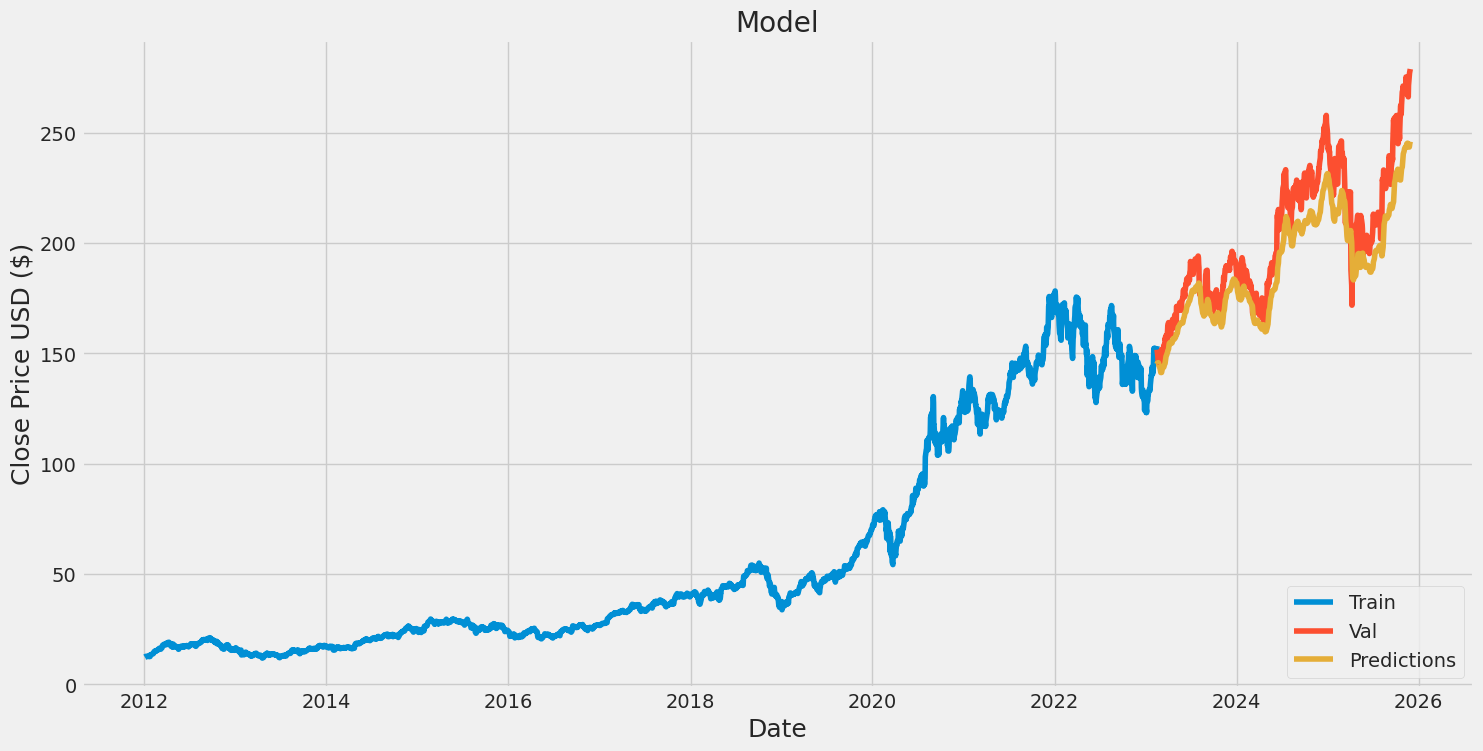

In [42]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [43]:
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2023-02-16,151.656754,145.211777
2023-02-17,150.512268,145.607986
2023-02-21,146.496628,145.780563
2023-02-22,146.920853,145.426041
2023-02-23,147.404327,144.896408
...,...,...
2025-11-21,271.489990,243.536987
2025-11-24,275.920013,243.491379


## Conclusion :

### Predicted results resemble actual values to a good extent. Hence the model is successfully executed with near accurate expectancy.